In [1]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.parameters = None

    def fit(self, X, y, method="gd"):
        X = np.c_[np.ones(X.shape[0]), X]  # Add bias term
        self.parameters = np.zeros(X.shape[1])
        if method == "gd":
            self._gradient_descent(X, y)
        elif method == "sgd":
            self._stochastic_gradient_descent(X, y)
        elif method == "normal":
            self._normal_equation(X, y)

    def _gradient_descent(self, X, y):
        for _ in range(self.epochs):
            y_pred = X.dot(self.parameters)
            gradient = X.T.dot(y_pred - y) / y.size
            self.parameters -= self.learning_rate * gradient

    def _stochastic_gradient_descent(self, X, y):
        for _ in range(self.epochs):
            for i in range(X.shape[0]):
                y_pred = X[i].dot(self.parameters)
                gradient = (y_pred - y[i]) * X[i]
                self.parameters -= self.learning_rate * gradient

    def _normal_equation(self, X, y):
        self.parameters = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]  # Add bias term
        return X.dot(self.parameters)

# Generate data
np.random.seed(0)
x = np.array([x / 100 for x in range(0, 500)])
y = np.array([x / 100 for x in range(0, 500)]) + np.random.normal(0, 0.5, 500)  # With Gaussian noise

# Train models
model_gd = LinearRegression(learning_rate=0.01, epochs=100)
model_gd.fit(x, y, method="gd")

model_sgd = LinearRegression(learning_rate=0.01, epochs=100)
model_sgd.fit(x, y, method="sgd")

model_normal = LinearRegression()
model_normal.fit(x, y, method="normal")

# Print parameters
print("Parameters (GD):", model_gd.parameters)
print("Parameters (SGD):", model_sgd.parameters)
print("Parameters (Normal):", model_normal.parameters)

Parameters (GD): [0.23057904 0.91981708]
Parameters (SGD): [0.06159199 0.97411866]
Parameters (Normal): [0.04152677 0.97827495]


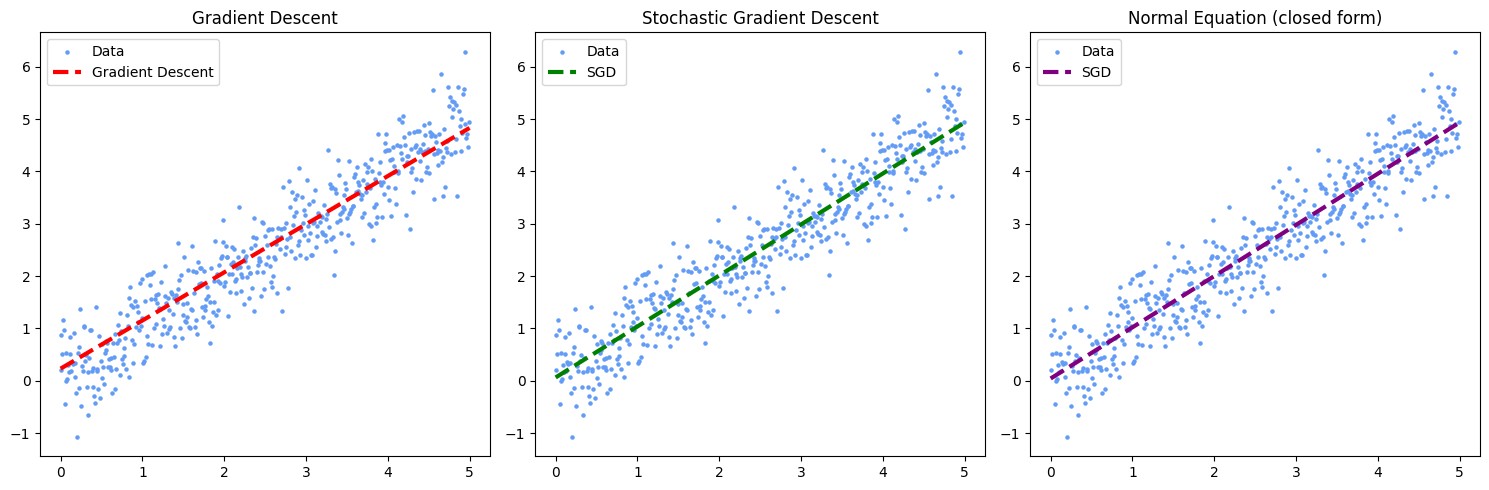

In [2]:
# Plot results in subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

x_vals = np.linspace(0, 5, 100)
y_vals_gd = model_gd.predict(x_vals)
y_vals_sgd = model_sgd.predict(x_vals)
y_vals_normal = model_normal.predict(x_vals)

# Subplot 1: Gradient Descent
axes[0].scatter(x, y, label='Data', color='#649cf5', s=5)
axes[0].plot(x_vals, y_vals_gd, color='red', label='Gradient Descent', linestyle='dashed', linewidth=3)
axes[0].set_title("Gradient Descent")
axes[0].legend()

# Subplot 2: Stochastic Gradient Descent
axes[1].scatter(x, y, label='Data', color='#649cf5', s=5)
axes[1].plot(x_vals, y_vals_sgd, color='green', label='SGD', linestyle='dashed', linewidth=3)
axes[1].set_title("Stochastic Gradient Descent")
axes[1].legend()

# Subplot 3: Normal Equation
axes[2].scatter(x, y, label='Data', color='#649cf5', s=5)
axes[2].plot(x_vals, y_vals_normal, color='purple', label='SGD', linestyle='dashed', linewidth=3)
axes[2].set_title("Normal Equation (closed form)")
axes[2].legend()

plt.tight_layout()
plt.show()

In [3]:
import plotly.graph_objects as go
# 3D Loss function visualization using Plotly
w0_vals = np.linspace(-10, 20, 50)
w1_vals = np.linspace(-10, 20, 50)
W0, W1 = np.meshgrid(w0_vals, w1_vals)
loss_vals = np.zeros_like(W0)

X_extended = np.c_[np.ones(x.shape[0]), x]

for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        w = np.array([W0[i, j], W1[i, j]])
        y_pred = X_extended.dot(w)
        loss_vals[i, j] = ((y - y_pred) ** 2).mean()

fig = go.Figure(data=[go.Surface(z=loss_vals, x=W0, y=W1, colorscale='Viridis')])
fig.update_layout(title='Loss Function Surface', scene=dict(
    xaxis_title='w0',
    yaxis_title='w1',
    zaxis_title='Loss'
))
fig.show()